# An introduction to Keras

We're going to learn about what Keras is and use it to build a small neural network.

## What is Keras?

Keras is a neural network library that simplifies the building and testing of neural network models. It offers more control over the architecture of the model than you would find in `scikit-learn`, but is still intuitive and pretty user friendly.  Keras requires a backend, commonly `Tensorflow` or `Theano`, to handle all the calculations that go into training a neural network.

We'll familiarize ourselves with how Keras works by doing a small classification problem.

## Using Keras: the Fashion-MNIST dataset

I'm tired of using the MNIST dataset, so we're going to use Zalando Research's [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist). A description of the dataset from the website:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.*

Here is what the dataset looks like:

![alt-test](https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true)

Each of the 10 classes has 3 rows of examples in the picture above. The 10 classes are:

| Label | Description |
|-------|-------------|
| 0     | T-shirt/Top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

### Loading the dataset

Keras has an API to load the Fashion-MNIST from the Zalando Research repo:

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


This downloads the data from the Fashion-MNIST database and load it into testing and training sets. Let's take a look at the data and learn more about it. 

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

As advertised, there are 60000 training points and 10000 testing points. Each of those points is a 28 by 28 image.

In [4]:
y_train.shape

(60000,)

In [5]:
y_test.shape

(10000,)

These are the 60000 and 10000 labels for the training and testing sets (respectively). Let's see what those are:

In [6]:
for i in range(10):
    print(y_train[i])

9
0
0
3
0
2
7
2
5
5


These are integer labels corresponding to what class each of the images are. Let's create a list of class labels to make it a little more meaningful:

In [7]:
class_labels = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Now we can do this:

In [8]:
for i in range(10):
    print(class_labels[y_train[i]])

Ankle boot
T-shirt/Top
T-shirt/Top
Dress
T-shirt/Top
Pullover
Sneaker
Pullover
Sandal
Sandal


Let's take a look at an image.

In [9]:
import sys
sys.path.insert(0, '../src/')
from gml_utils.visualization import show_labeled_figure

In [10]:
show_labeled_figure(x_train, y_train, class_labels, 1)

<Figure size 640x480 with 2 Axes>

Mess around with the function to check out other images.

#### Q1

* What are some preprocessing steps that we need to do?
* What are some questions you have about the data set?

### Preprocessing

Let's normalize the values to be between 0 and 1:

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Let's double check to make sure the values have been correctly transformed:

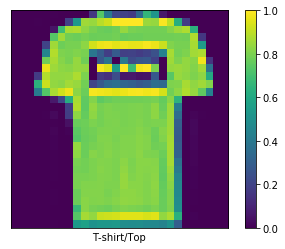

In [12]:
show_labeled_figure(x_train, y_train, class_labels, 1)

### Building the model

We're now going to build a neural network model with a single hidden layer. Building a neural network in Keras is done by adding layers to a `model` object. There are a ton of layers which you can read about [at the Keras website](https://keras.io/layers/core/). We're building a relatively simple network today, so we're only going to use the `Dense` and `Flatten` layers. The first step in building the model is to create a `Sequential` object:

In [13]:
from keras.models import Sequential

model = Sequential() 

From here, we add on layers using `model.add` and putting the name of the layer we want. We'll add a `Flatten` layer first to transform our data from a 2-dimensional matrix to a 1-dimensional list. Since this `Flatten` layer is the first layer being added to the model, we need to add an `input_shape` argument telling the model what the data we'll be inputting will look like:

In [14]:
from keras.layers import Flatten

model.add(Flatten(input_shape = (28, 28)))

Now we're going to add a fully-connected hidden layer with 256 hidden nodes and a ReLU activation. This is done a by adding `Dense` layer:

In [15]:
from keras.layers import Dense

model.add(Dense(256, activation = "relu"))

Instructions for updating:
Colocations handled automatically by placer.


Finally, we're going to add our activation layer. This is another `Dense` layer with one node for each of our ten classes. We'll use a `softmax` activation function in this layer.

In [16]:
model.add(Dense(10, activation = "softmax"))

We have all the layers we need. All we have to do now is to compile the model. When we compile it, we need to tell the model which optimization algorithm to use, which loss function to use to measure the accuracy of the model during training, and the metric used to 

In [17]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

To collect all the code in one place:

In [18]:
model = Sequential() 
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

Alternatively, you can pass all the layers and arguments you want when you create the `Sequential` object:

In [19]:
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(256, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

We can print out information about the model using `model.summary`:

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


And that's it. We're now ready to train the network.

### Training the model

Just like with `scikit-learn`, we train the network by calling `model.fit` with the attributes and targets of the dataset. Recall that training a neural network involves several rounds of making predictions and adjusting the weights. We call each round of predictions and adjustments epochs. For now, we'll just do 10 epochs. We'll also tell Keras to use a 10% validation split.

In [21]:
model.fit(x_train, y_train, epochs = 1, 
          validation_split = 0.1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 8s 149us/step - loss: 0.4963 - acc: 0.8266 - val_loss: 0.4165 - val_acc: 0.8438


Let's evaluate the performance of our model on the testing dataset:

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss: {}\nTest accuracy: {}'.format(test_loss, test_acc))

10000/10000 [==============================] - 0s 47us/step
Test loss: 0.43345149700641633
Test accuracy: 0.8411


So we achieved an accuracy of 88.9% on the testing set.

#### Q2

* How do we read the output of `model.fit`?
* What is a straightforward fix to increase the accuracy of our model?

### Making predictions

Let's use our model to make predictions on the test set and visualize the results.

In [23]:
test_predictions = model.predict(x_test)
test_predictions.shape

(10000, 10)

What does the shape of `test_predictions` mean?

Let's look at one data point in `test_predictions`:

In [24]:
test_predictions[0]

array([1.5507594e-05, 3.5540157e-07, 5.2714963e-06, 3.1912252e-06,
       8.5747970e-06, 1.2347671e-01, 1.9900643e-05, 2.4774358e-01,
       7.5602427e-04, 6.2797087e-01], dtype=float32)

What do these numbers represent?

Let's visualize an image and the distribution of predictions.

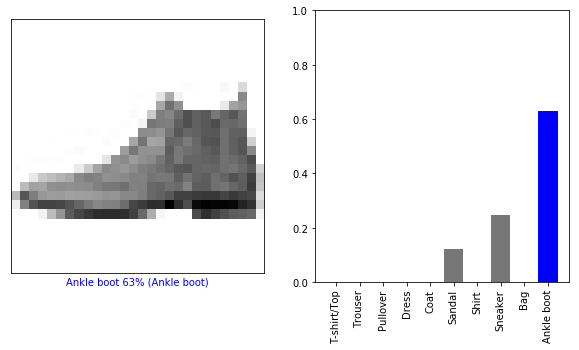

In [25]:
from gml_utils.visualization import show_image_with_predictions

show_image_with_predictions(0, test_predictions, y_test, x_test, class_labels)

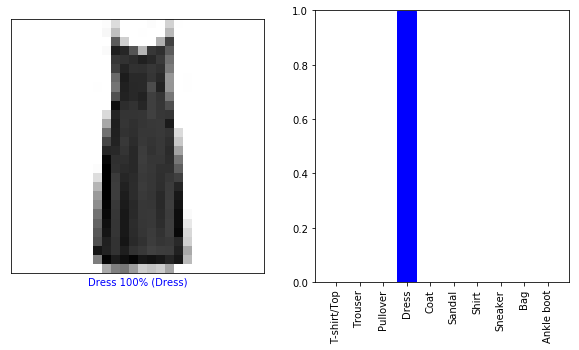

In [26]:
show_image_with_predictions(13, test_predictions, y_test, x_test, class_labels)

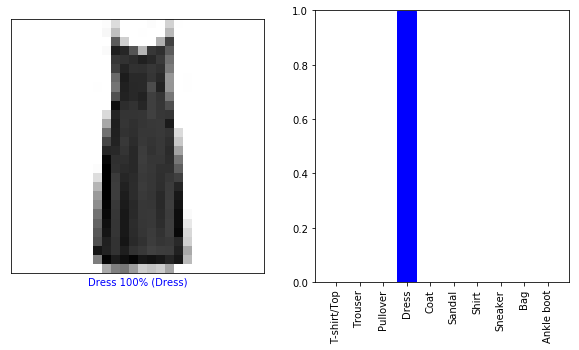

In [27]:
show_image_with_predictions(13, test_predictions, y_test, x_test, class_labels)

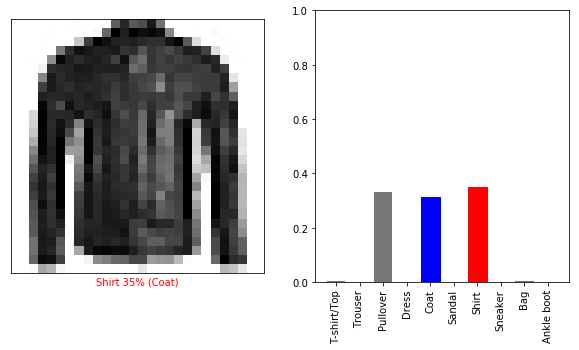

In [28]:
show_image_with_predictions(50, test_predictions, y_test, x_test, class_labels)

And the confusion matrix:

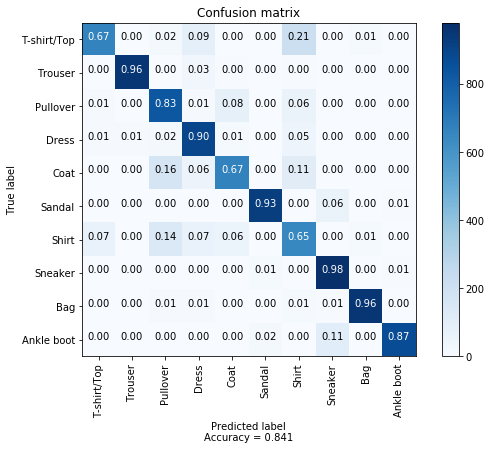

In [29]:
from sklearn.metrics import confusion_matrix
from gml_utils.visualization import plot_confusion_matrix

fashion_cm = confusion_matrix(y_test, test_predictions.argmax(axis = 1))
plot_confusion_matrix(fashion_cm, class_labels)

### Q3

* Make a new model with a few more hidden layers. Vary the number of nodes and increase the number of epochs. Compare your results to [Zalando Research benchmarks](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/).
* Keras neural networks are compatible with GridSearchCV from `scikit-learn`, but it's a little more involved. Follow [this page](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/) to try and implement it yourself.
* A popular type of neural network used for image recognition tasks are [convolutional neural networks](https://en.wikipedia.org/wiki/Convolutional_neural_network). Make a new model with a [Conv2D](https://keras.io/layers/convolutional/) layer as input. Set `filters = 1` and `kernel_size = (2, 2)`.
